## Importing package and loading data

In [38]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [39]:
# loading data

df = pd.read_csv('complaints.csv')
df.shape

(4065103, 18)

In [40]:
df.sample(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1156298,2018-04-18,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,"I submitted a claim three months ago, quoted a...",NaN,AMERICAN EXPRESS COMPANY,IA,501XX,NaN,Consent provided,Web,2018-04-18,Closed with non-monetary relief,Yes,NaN,2878081
2362237,2020-07-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,10033,NaN,Other,Web,2020-07-21,Closed with explanation,Yes,NaN,3755932
3324084,2023-07-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2023-07-21,In progress,Yes,NaN,7284113
2166395,2023-08-09,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,IL,60609,NaN,NaN,Web,2023-08-09,In progress,Yes,NaN,7376027
1358530,2022-12-14,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MO,63701,NaN,Consent not provided,Web,2022-12-14,Closed with explanation,Yes,NaN,6321786
3741697,2015-01-26,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,AFNI INC.,TX,76119,NaN,NaN,Web,2015-01-26,Closed with explanation,Yes,No,1209427
958652,2023-02-11,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Factor Trust,NV,89121,NaN,Consent not provided,Web,2023-02-11,Closed with explanation,Yes,NaN,6559934
2079090,2016-06-06,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"CARRINGTON MORTGAGE SERVICES, LLC",OH,43207,"Older American, Servicemember",NaN,Phone,2016-06-08,Closed with explanation,Yes,No,1956248
2766163,2019-07-03,Student loan,Private student loan,Dealing with your lender or servicer,Trouble with how payments are being handled,On XX/XX/19 I used the online service with Dis...,NaN,DISCOVER BANK,WY,82070,NaN,Consent provided,Web,2019-07-04,Closed with non-monetary relief,Yes,NaN,3295886
1279531,2022-12-15,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,My XXXX XXXX XXXX that was serviced by XXXX ...,NaN,"Bread Financial Holdings, Inc.",RI,02816,NaN,Consent provided,Web,2022-12-29,Closed with monetary relief,Yes,NaN,6326440


## Exploratory data Anaylysis and Feature Engineering

In [41]:
df.sample(2, random_state=0).T

,3120610,1275766
Date received,2023-01-25,2017-05-17
Product,Credit card or prepaid card,Debt collection
Sub-product,General-purpose credit card or charge card,Credit card debt
Issue,Problem with a purchase shown on your statement,Attempts to collect debt not owed
Sub-issue,Credit card company isn't resolving a dispute ...,Debt was already discharged in bankruptcy and ...
Consumer complaint narrative,"Late payment is inaccurate, was never late Cal...",On XXXX / XXXX / XXXX my employer received...
Company public response,NaN,NaN
Company,CAPITAL ONE FINANCIAL CORPORATION,Forster & Garbus LLP
State,NY,NY
ZIP code,11727,12550


Here we can work with either of the columns Issue or customer complaint narrative but to be precise with the mmodel output we stick with the narrtive as it has more detailed explanation and can help us to get more precise model.

In [42]:
# create a working data frame with two required columns a.k.a wdf

wdf = df[['Product', 'Consumer complaint narrative']].copy()
wdf

,Product,Consumer complaint narrative
0,"Money transfer, virtual currency, or money ser...",NaN
1,Debt collection,NaN
2,Checking or savings account,NaN
3,Debt collection,NaN
4,Credit reporting or other personal consumer re...,NaN
...,...,...
4065098,Credit card,NaN
4065099,Credit reporting,NaN
4065100,Mortgage,NaN
4065101,Debt collection,NaN


In [43]:
# checking the missing values

wdf.isna().sum()

Product                               0
Consumer complaint narrative    2592900
dtype: int64

In [44]:
# removing the missing values

wdf = wdf[pd.notnull(wdf['Consumer complaint narrative'])]
print(wdf.notnull().sum())
wdf

Product                         1472203
Consumer complaint narrative    1472203
dtype: int64


,Product,Consumer complaint narrative
149,Mortgage,On XX/XX/ I made a written request to have PMI...
157,Mortgage,This complaint relates to Select Portfolio Ser...
176,"Credit reporting, credit repair services, or o...",A couple years ago I became aware of identity ...
178,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...
378,"Credit reporting, credit repair services, or o...",Lexington law is what happened.\n\nThey dooped...
...,...,...
4064872,Debt collection,"I XXXX XXXX am a person, non-adverse, non-bell..."
4064900,Checking or savings account,"On XXXX XX/XX/2022, my spouse and I - who move..."
4064903,Debt collection,Original Creditor - XXXX XXXX ; XXXX XXXX - US...
4065036,"Money transfer, virtual currency, or money ser...","On XX/XX/22, I contracted with XXXX XXXX ( DBA..."


Although our dataset has greatly reduced after this step but we can work with the complaints on issue provided only.

In [45]:
# Renaming the columns for simplicity
wdf.columns = ['Product', 'complaint']
print(wdf.sample(1).T)
print(wdf.shape)

                                                     1440398
Product                                             Mortgage
complaint  On XXXX XXXX, 2015, I was looking to refinance...
(1472203, 2)


In [46]:
# Percentage of the complaints with text

round(len(wdf)/len(df) * 100, 1)

36.2

In [47]:
# list of aall the products or categories in the data set

sorted(wdf.Product.unique())

['Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting or other personal consumer reports',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Debt or credit management',
 'Money transfer, virtual currency, or money service',
 'Money transfers',
 'Mortgage',
 'Other financial service',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Payday loan, title loan, personal loan, or advance loan',
 'Prepaid card',
 'Student loan',
 'Vehicle loan or lease',
 'Virtual currency']

Since we have to classify only the 4 categories we will select the data belonging to those particular categories and store in a dataset named required dataset a.k.a rdf and discard the rest from our wdf.

In [48]:
req_products = ['Credit reporting, credit repair services, or other personal consumer reports',
                'Debt collection',
                'Consumer Loan',
                'Mortgage']

rdf = wdf[wdf.Product.isin(req_products)]
rdf

,Product,complaint
149,Mortgage,On XX/XX/ I made a written request to have PMI...
157,Mortgage,This complaint relates to Select Portfolio Ser...
176,"Credit reporting, credit repair services, or o...",A couple years ago I became aware of identity ...
178,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...
378,"Credit reporting, credit repair services, or o...",Lexington law is what happened.\n\nThey dooped...
...,...,...
4064667,Mortgage,Up until recently I had a mortgage with XXXX X...
4064756,Debt collection,After being personally harassed in public with...
4064872,Debt collection,"I XXXX XXXX am a person, non-adverse, non-bell..."
4064903,Debt collection,Original Creditor - XXXX XXXX ; XXXX XXXX - US...


Now we have to work with only these 881,051 values.

Since the categoies have a bigger names can be renamed foor easier computation ans easy work purposes

In [49]:
rdf.Product.unique()

array(['Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Consumer Loan'], dtype=object)

In [50]:
# Renaming categories

rename_dict = {'Credit reporting, credit repair services, or other personal consumer reports' :
                'Credit reporting, repair, or other',
                                         'Debt collection' : 'Debt collection',
                                         'Consumer Loan' : 'Consumer Loan',
                                         'Mortgage' : 'Mortgage'
                                    }

rdf.loc[:, 'Product'] = rdf.loc[:, 'Product'].replace(rename_dict)

C:\Users\srija\AppData\Local\Temp\ipykernel_18948\3936880472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.loc[:, 'Product'] = rdf.loc[:, 'Product'].replace(rename_dict)


In [51]:
rdf.Product.unique()

array(['Mortgage', 'Credit reporting, repair, or other',
       'Debt collection', 'Consumer Loan'], dtype=object)

Now Providing each category a number for the model to understand and use it efficiently.

In [52]:
rdf['cat_id'] = rdf.Product.factorize(sort = True)[0] # contains category idor the number provided to the category.

C:\Users\srija\AppData\Local\Temp\ipykernel_18948\1741130520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['cat_id'] = rdf.Product.factorize(sort = True)[0] # contains category idor the number provided to the category.


In [53]:
# New data frame after adding the column
rdf.sample(10)

,Product,complaint,cat_id
454083,Debt collection,I had a membership at XXXX XXXX for a couple m...,2
2593745,"Credit reporting, repair, or other",Amsher Collection SE broken all laws that foll...,1
326792,"Credit reporting, repair, or other",Hey Hope all is well. I was looking through my...,1
1084082,"Credit reporting, repair, or other",I'm really not sure what happened. I have mail...,1
2785230,"Credit reporting, repair, or other",In accordance with the Fair Credit Reporting a...,1
1420318,"Credit reporting, repair, or other",DO NOT CLOSE THIS COMPLAINT FOR ANY REASON IM ...,1
1932294,"Credit reporting, repair, or other","I AM THE VICTIM OF IDENTITY THEFT, PLEASE HELP...",1
975123,Mortgage,Received in the mail Trial Modification Plan f...,3
524178,"Credit reporting, repair, or other",I agree the two settlements were done per your...,1
3991950,Debt collection,I pulled my credit report while saving to buy ...,2


In [54]:
cat_id_df = rdf[['Product', 'cat_id']].drop_duplicates()

# dictionries that are to be used further in the code
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['cat_id', 'Product']].values)

print(cat_to_id)
id_to_cat

{'Mortgage': 3, 'Credit reporting, repair, or other': 1, 'Debt collection': 2, 'Consumer Loan': 0}


{3: 'Mortgage',
 1: 'Credit reporting, repair, or other',
 2: 'Debt collection',
 0: 'Consumer Loan'}

The bar chart below shows number of complints in every category.

Text(0.5, 0, 'Number of occurences')

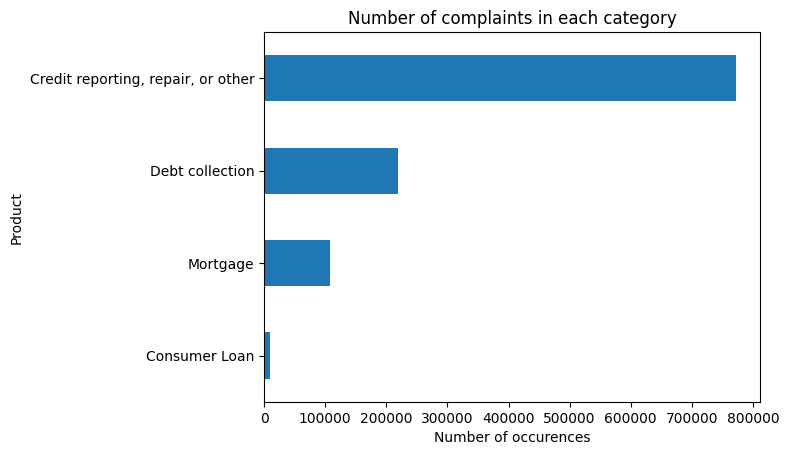

In [55]:
# plotting the bar chart

rdf.groupby('Product').complaint.count().sort_values().plot.barh()
plt.title('Number of complaints in each category')
plt.xlabel('Number of occurences')

## Text Preprocessing

using Term Frequency Inverse Document Frequency (TFIDF)
which is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

In [56]:
# reducing the size of the dataset so system can handle the computations of the model
# now working on the data set of the size 50000.
rdf1 = rdf.sample(10000, random_state=43)

In [57]:
rdf1.sample(5)

,Product,complaint,cat_id
3439925,"Credit reporting, repair, or other",Dear Sir or Madam : I am a victim of identity ...,1
314643,Debt collection,I called the collection company they said I ha...,2
1982395,"Credit reporting, repair, or other",My name is XXXX XXXX this complaint is not mad...,1
1058675,Debt collection,"On XX/XX/XXXX, I contacted a loan officer at m...",2
2067011,"Credit reporting, repair, or other",The following inquiries are on my Credit repor...,1


In [58]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words='english')

# changing complaints to vector 
features = tfidf.fit_transform(rdf1.complaint).toarray()

In [59]:
labels = rdf1.cat_id
print("The %d complaints are converted to %d features" %(features.shape))

The 10000 complaints are converted to 24852 features


In [60]:
# Find 3 most correlated terms with each of the product categories

n = 5

for product, cat_id in sorted(cat_to_id.items()):
    features_chi2 = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n>>>>> %s :" %(product))
    print("-- Most related unigrams are : %s" %(','.join(unigrams[-n:])))
    print("-- Most related bigrams are : %s" %(','.join(bigrams[-n:])))


>>>>> Consumer Loan :
-- Most related unigrams are : vehicle,repossessed,car,dealer,honda
-- Most related bigrams are : car repossessed,washington xxxx,toyota financial,new car,lien property

>>>>> Credit reporting, repair, or other :
-- Most related unigrams are : collect,pay,collection,mortgage,debt
-- Most related bigrams are : reporting agency,consumer reporting,collection agency,15 1681,1681 section

>>>>> Debt collection :
-- Most related unigrams are : recovery,owe,collect,collection,debt
-- Most related bigrams are : portfolio recovery,debt collection,trying collect,collect debt,collection agency

>>>>> Mortgage :
-- Most related unigrams are : home,loan,escrow,modification,mortgage
-- Most related bigrams are : mortgage payment,wells fargo,escrow account,mortgage company,loan modification


## Selection of Multiclass Classification model

Multi class classification models :
    
    1. Multinomial Naive Bayes
    2. Linear Support Vector Machine
    3. Random Forest
    4. Logistic Regression

##### Splitting the data into train and test sets
we will split the data in x (80%) and y(20%) for training and testing of the model respectivly

In [61]:
rdf1.sample(5)

,Product,complaint,cat_id
3842874,Debt collection,Capitol One sent collection notices in me the ...,2
79004,"Credit reporting, repair, or other",This is not a duplicate nor is this complaint ...,1
3744886,"Credit reporting, repair, or other",I FILED A DISPUTE WITH THE CREDIT REPORTING AG...,1
3457152,"Credit reporting, repair, or other",I ordered a copy of my report in XXXX dated XX...,1
3310578,Mortgage,I noticed on my most recent credit report that...,3


In [62]:
xTrain, xTest, yTrain, yTest = train_test_split(rdf1.complaint, rdf1.Product, test_size=0.2, random_state=42)
print(xTrain.shape)
print(xTest.shape)

(8000,)
(2000,)


In [63]:
models = [MultinomialNB(),
          LinearSVC(),
          RandomForestClassifier(n_estimators=100,
                                 max_depth = 5,
                                 random_state=43),
          LogisticRegression(random_state=43)]

cross_val = 5 #cross_validationd
cv_df = pd.DataFrame(index=range(cross_val * len(models)))

entries = []

for model in models:
    model_name = model.__class__.__name__
    acc = cross_val_score(model,
                          features,
                          labels,
                          scoring = 'accuracy',
                          cv = cross_val) # Accuracies
    for fold_idx, accu in enumerate(acc):
        entries.append((model_name, fold_idx, accu))
    
cv_df = pd.DataFrame(entries, columns=['Model', 'fold_idx', 'Accuracy'])
        

## Comaprision and model performance

In [64]:
mean_acc = cv_df.groupby('Model').Accuracy.mean()
std_acc = cv_df.groupby('Model').Accuracy.std()

accuracy_table = pd.concat([mean_acc, std_acc],
                axis = 1,
                ignore_index=True)
accuracy_table.columns = ['Mean Accuracy', 'Standard Deviation']
accuracy_table

,Mean Accuracy,Standard Deviation
Model,,
LinearSVC,0.9060,0.006114
LogisticRegression,0.8990,0.005454
MultinomialNB,0.8719,0.005716
RandomForestClassifier,0.6907,0.000570


## Model Evaluation

In [65]:
x_Train, x_Test, y_Train, y_Test = train_test_split(features,
                                                              labels,
                                                              random_state=43)
model = LinearSVC()
model.fit(x_Train, y_Train)
y_pred = model.predict(x_Test)

In [66]:
print(metrics.classification_report(y_Test, y_pred, target_names = rdf1['Product'].unique()))

                                    precision    recall  f1-score   support

                          Mortgage       0.00      0.00      0.00        19
Credit reporting, repair, or other       0.93      0.96      0.94      1747
                   Debt collection       0.83      0.79      0.81       485
                     Consumer Loan       0.93      0.91      0.92       249

                          accuracy                           0.91      2500
                         macro avg       0.67      0.66      0.67      2500
                      weighted avg       0.90      0.91      0.91      2500



C:\Users\srija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix - Linear SVC')

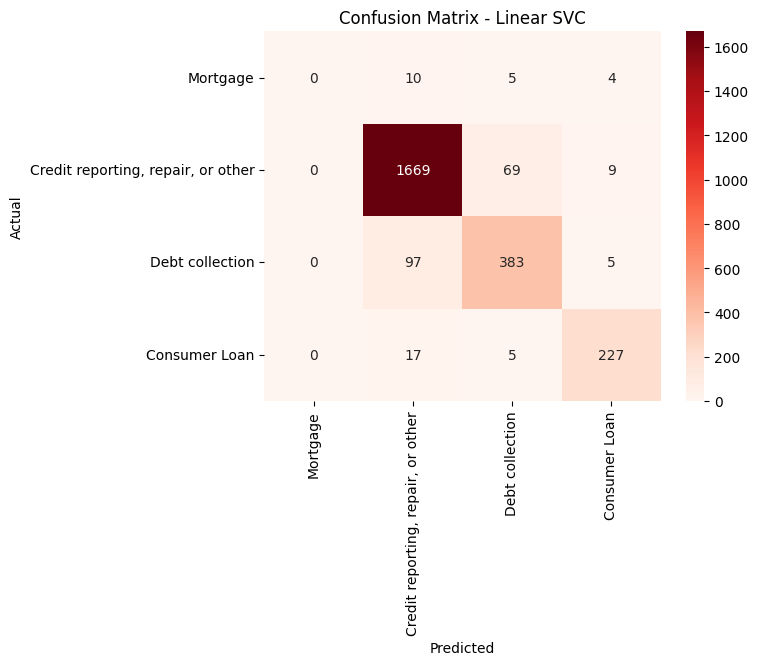

In [67]:
conf_mat = confusion_matrix(y_Test, y_pred)
sns.heatmap(conf_mat, annot = True, cmap='Reds', fmt='d',
            xticklabels=cat_id_df.Product.values,
            yticklabels=cat_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Linear SVC')

## Predictions

In [68]:
xTrain, xTest, yTrain, yTest = train_test_split(rdf1.complaint,
                                                rdf1.Product,
                                                test_size=0.2,
                                                random_state=42)

tfidf = TfidfVectorizer(sublinear_tf=True,
                        min_df=5,
                        ngram_range=(1,2),
                        stop_words='english')

fitted_vectorizer = tfidf.fit(xTrain)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(xTrain)

model = LinearSVC().fit(tfidf_vectorizer_vectors, yTrain)

In [69]:
rdf.iloc[579110 -1][0]

'Credit reporting, repair, or other'

In [70]:
rdf.iloc[579110 -1][1]

'I have repeatedly tried to request new Rez to remove the late from XX/XX/XXXX on my credit report. This was an accurately reported as the system was down when I tried to make my payment at the end of the month which would not have been late. I do that every month with no issues. I have snapshots showing that the system was down yet they are coming back saying that they have no login information for me during that day which is crazy because the system is clearly down and why theres a glitch and them not showing me logged in. I obviously have snapshots showing that the system was down which wouldnt have taken place after the fact because the date on the snapshots indicate the system being down on XXXX XXXX. They keep coming up with excuses why they wont remove it and at minimally I would requested to be done as a courtesy even though out of principle it should be done Ive been a loyal customer and Ive never been late on my payment to them. Is clearly was a system error and I refuse to l

In [71]:
def predict(new_comp):
    return model.predict(fitted_vectorizer.transform([new_comp]))

In [72]:
new_complaint = 'I have repeatedly tried to request new Rez to remove the late from XX/XX/XXXX on my credit report. This was an accurately reported as the system was down when I tried to make my payment at the end of the month which would not have been late. I do that every month with no issues. I have snapshots showing that the system was down yet they are coming back saying that they have no login information for me during that day which is crazy because the system is clearly down and why theres a glitch and them not showing me logged in. I obviously have snapshots showing that the system was down which wouldnt have taken place after the fact because the date on the snapshots indicate the system being down on XXXX XXXX. They keep coming up with excuses why they wont remove it and at minimally I would requested to be done as a courtesy even though out of principle it should be done Ive been a loyal customer and Ive never been late on my payment to them. Is clearly was a system error and I refuse to let this go. I am correct and I am very upset and frustrated that they have negatively reported this on my credit report when I have been a loyal customer and have proven to them with many snapshots that I tried to login and was unsuccessful due to the system error and then going down. Hi again kindly ask that somebody please review this without giving me the response the system wasnt down because it was And remove my late from the credit report as I am trying to refinance my house and this is hurting me to do so I am trying to refinance directly with their company yet they still want to charge me a late. This is ridiculous and an unacceptable and I will not give up fighting this because I was not late nor have I ever been late. Please review this to be removed off my credit report and updated as the payment was made first thing the following morning when the system went back up. Please Remove the late off my credit report from XX/XX/XXXX.'
print(predict(new_complaint))

['Credit reporting, repair, or other']


In [73]:
complaint = rdf.iloc[0][1]
print(predict(complaint))
print(rdf.iloc[0][0])

['Mortgage']
Mortgage
